In [1]:
import pandas as pd

In [2]:
import os

In [4]:
os.chdir('C:\\Users\\rgarcia\\Documents\\data')

In [32]:
import geopandas as gpd

In [107]:
from matplotlib import pyplot as plt

In [93]:
from math import ceil

In [5]:
os.listdir()

['agora_vai.json',
 'BR_Municipios_2021_low_res.json',
 'BR_Municipios_2021_very_low_res.json',
 'BR_UF_2021_low_res.json',
 'BR_UF_2021_mid_res.json',
 'BR_UF_2021_very_low_res.json',
 'candidatos_governador_por_municipio_separado.csv',
 'candidatos_por_municipio_sao_paulo_separado.csv',
 'candidatos_presidente_por_municipio_separado.csv',
 'candidato_redes_total.csv',
 'cargo.csv',
 'codigos_IBGE_TSE.csv',
 'consulta_cand_2018_BRASIL.csv',
 'consulta_cand_2022_BRASIL.csv',
 'consulta_cand_2022_BRASIL_08_19.csv',
 'dep_est_partido.csv',
 'dep_est_uf.csv',
 'dep_fed_partido.csv',
 'dep_fed_uf.csv',
 'detalhe_votacao_munzona_2018_BRASIL.csv',
 'Estados',
 'geojs-100-mun.json',
 'gov_sp_1t_2022.geojson',
 'gov_sp_1t_2022_pts.csv',
 'historico.csv',
 'leiame_vota_secao.pdf',
 'muda_cor_candidato.csv',
 'muda_cor_partido.csv',
 'Municipios',
 'municipios_brasileiros_tse.csv',
 'mun_low_res.json',
 'mun_very_low_res.geojson',
 'new_low.geojson',
 'redes_sociais_candidatos.csv',
 'rede_socia

In [195]:
df = pd.read_csv('votacao_candidato_munzona_2020_SP.csv', sep=';', encoding='ISO-8859-1', decimal=',', thousands='.')

In [196]:
df = df[df.CD_MUNICIPIO == 71072] # São Paulo município

In [197]:
df = df[df.DS_CARGO == 'Prefeito']

In [198]:
df = df[df.NR_TURNO == 2]

In [199]:
df = df.groupby(['NR_ZONA', 'NM_URNA_CANDIDATO', 'SG_PARTIDO']).QT_VOTOS_NOMINAIS.sum().reset_index()

In [200]:
cand1 = df.groupby(['NM_URNA_CANDIDATO']).QT_VOTOS_NOMINAIS.sum().reset_index().nlargest(2, 'QT_VOTOS_NOMINAIS').iat[0,0]

In [201]:
cand2 = df.groupby(['NM_URNA_CANDIDATO']).QT_VOTOS_NOMINAIS.sum().reset_index().nlargest(2, 'QT_VOTOS_NOMINAIS').iat[1,0]

In [202]:
df = df[df.NM_URNA_CANDIDATO.isin([cand1, cand2])].pivot(index='NR_ZONA', columns='NM_URNA_CANDIDATO', values='QT_VOTOS_NOMINAIS').reset_index()

In [203]:
zonemap= gpd.read_file('Zonas_Eleitorais_SP.json')

In [204]:
zonemap = zonemap[zonemap.FIRST_sede == 'SÃO PAULO']

<AxesSubplot:>

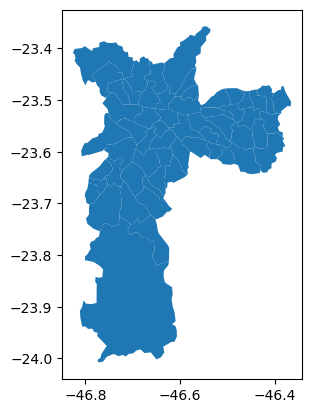

In [205]:
zonemap.plot()

In [206]:
df.columns[1] +'_PCT'

'BRUNO COVAS_PCT'

In [207]:
df[df.columns[1] +'_PCT'] =  (df[df.columns[1]]/(df[df.columns[1]]+df[df.columns[2]])*100).round(1)

In [208]:
df[df.columns[2] +'_PCT'] =  (df[df.columns[2]]/(df[df.columns[1]]+df[df.columns[2]])*100).round(1)

In [211]:
df['VANTAGEM_PCT'] = df[df.columns[3]]-df[df.columns[4]]

In [212]:
votemap = zonemap[['ZEFINAL', 'FIRST_NOME', 'geometry']].rename(columns={'ZEFINAL':'NR_ZONA'}).merge(df, on='NR_ZONA', how='left')

In [213]:
bounds = ceil(max([abs(votemap.VANTAGEM_PCT.min()), abs(votemap.VANTAGEM_PCT.max())]))

In [214]:
bounds

52

<AxesSubplot:>

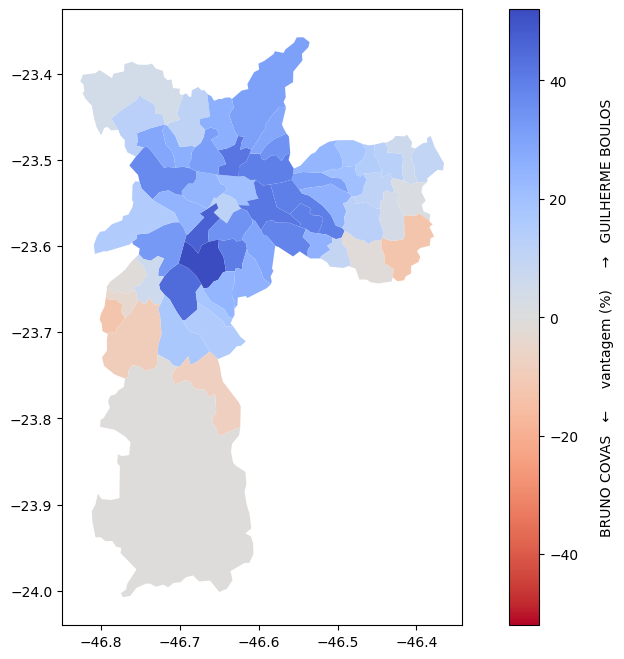

In [215]:
votemap.plot(column='VANTAGEM_PCT', legend=True, figsize=(12,8), cmap='coolwarm_r', vmax=bounds, vmin=bounds*-1,
            legend_kwds={'label':f'\n{df.columns[1]}   ←     vantagem (%)     →   {df.columns[2]}'})

In [216]:
votemap['FIRST_NOME'] = votemap.FIRST_NOME.str.replace('SÃO PAULO - ', '').str.title()

In [217]:
votemap.columns = [i.title().replace('_Pct', ' (%)').replace('First_Nome', 'Nome').replace('Nr_', '').replace('Geometry', 'geometry') for i in votemap.columns]

In [218]:
votemap

,Zona,Nome,geometry,Bruno Covas,Guilherme Boulos,Bruno Covas (%),Guilherme Boulos (%),Vantagem (%)
0,1,Bela Vista,"POLYGON ((-46.62594 -23.55238, -46.62894 -23.5...",47535,37618,55.8,44.2,11.6
1,2,Perdizes,"POLYGON ((-46.64615 -23.53895, -46.64023 -23.5...",68650,41872,62.1,37.9,24.2
2,3,Santa Ifigênia,"POLYGON ((-46.62529 -23.51927, -46.65402 -23.5...",24640,16239,60.3,39.7,20.6
3,4,Moóca,"POLYGON ((-46.58503 -23.52840, -46.59456 -23.5...",66472,27318,70.9,29.1,41.8
4,5,Jardim Paulista,"POLYGON ((-46.69380 -23.59418, -46.68434 -23.6...",52730,19149,73.4,26.6,46.8
5,6,Vila Mariana,"POLYGON ((-46.60895 -23.56817, -46.61471 -23.5...",65524,31818,67.3,32.7,34.6
6,20,Valo Velho,"POLYGON ((-46.76945 -23.68344, -46.77394 -23.6...",41580,53815,43.6,56.4,-12.8
7,246,Santo Amaro,"POLYGON ((-46.67260 -23.64433, -46.67913 -23.6...",52056,20042,72.2,27.8,44.4
8,247,São Miguel Paulista,"POLYGON ((-46.41627 -23.52399, -46.41823 -23.5...",35217,27356,56.3,43.7,12.6
9,248,Itaquera,"POLYGON ((-46.43071 -23.52086, -46.43380 -23.5...",49155,39574,55.4,44.6,10.8


In [219]:
votemap.to_file('voto_zona_sp_capital_2020.json', driver='GeoJSON')